## 08-2 정규 표현식 시작하기

### 1. 정규 표현식의 기초, 메타 문자

정규 표현식에서 사용하는 메타 문자(meta characters)에는 다음과 같은 것이 있다.  

> 메타 문자란 원래 그 문자가 가진 뜻이 아닌 특별한 용도로 사용하는 문자를 말한다.



. ^ $ * + ? { } [ ] \ | ( )
정규 표현식에 위 메타 문자를 사용하면 특별한 의미를 갖게 된다.  

자, 그러면 가장 간단한 정규 표현식부터 시작해 각 메타 문자의 의미와 사용법을 알아보자.

#### 문자 클래스 [ ]
우리가 가장 먼저 살펴볼 메타 문자는 바로 문자 클래스(character class)인 [ ]이다. 문자 클래스로 만들어진 정규식은 "[ ] 사이의 문자들과 매치"라는 의미를 갖는다.

>문자 클래스를 만드는 메타 문자인 [ ] 사이에는 어떤 문자도 들어갈 수 있다.

즉 정규 표현식이 [abc]라면 이 표현식의 의미는 "a, b, c 중 한 개의 문자와 매치"를 뜻한다. 이해를 돕기 위해 문자열 "a", "before", "dude"가 정규식 [abc]와 어떻게 매치되는지 살펴보자.



- "a"는 정규식과 일치하는 문자인 "a"가 있으므로 매치
- "before"는 정규식과 일치하는 문자인 "b"가 있으므로 매치
- "dude"는 정규식과 일치하는 문자인 a, b, c 중 어느 하나도 포함하고 있지 않으므로 매치되지 않음

[ ] 안의 두 문자 사이에 하이픈(-)을 사용하면 두 문자 사이의 범위(From - To)를 의미한다. 예를 들어 [a-c]라는 정규 표현식은 [abc]와 동일하고 [0-5]는 [012345]와 동일하다.


다음은 하이픈(-)을 사용한 문자 클래스의 사용 예이다.

- [a-zA-Z] : 알파벳 모두
- [0-9] : 숫자

문자 클래스([ ]) 안에는 어떤 문자나 메타 문자도 사용할수 있지만 주의해야 할 메타 문자가 1가지 있다. 그것은 바로 ^인데, 문자 클래스 안에 ^ 메타 문자를 사용할 경우에는 반대(not)라는 의미를 갖는다. 예를 들어 [^0-9]라는 정규 표현식은 숫자가 아닌 문자만 매치된다.

----------------

#### 점프 투 파이썬

자주 사용하는 문자 클래스
[0-9] 또는 [a-zA-Z] 등은 무척 자주 사용하는 정규 표현식이다. 이렇게 자주 사용하는 정규식은 별도의 표기법으로 표현할 수 있다. 다음을 기억해 두자.

- \d - 숫자와 매치, [0-9]와 동일한 표현식이다.
- \D - 숫자가 아닌 것과 매치, [^0-9]와 동일한 표현식이다.
- \s - whitespace 문자와 매치, [ \t\n\r\f\v]와 동일한 표현식이다. 맨 앞의 빈 칸은 공백문자(space)를 의미한다.
- \S - whitespace 문자가 아닌 것과 매치, [^ \t\n\r\f\v]와 동일한 표현식이다.
- \w - 문자+숫자(alphanumeric)와 매치, [a-zA-Z0-9_]와 동일한 표현식이다.
- \W - 문자+숫자(alphanumeric)가 아닌 문자와 매치, [^a-zA-Z0-9_]와 동일한 표현식이다.

대문자로 사용된 것은 소문자의 반대임을 추측할 수 있다.

------------------

### Dot(.)
정규 표현식의 Dot(.) 메타 문자는 줄바꿈 문자인 \n을 제외한 모든 문자와 매치됨을 의미한다.

>나중에 배우겠지만 정규식을 작성할 때 re.DOTALL 옵션을 주면 \n 문자와도 매치된다.

다음 정규식을 보자.

a.b
위 정규식의 의미는 다음과 같다.

>"a + 모든문자 + b"

즉 a와 b라는 문자 사이에 어떤 문자가 들어가도 모두 매치된다는 의미이다.

이해를 돕기 위해 문자열 "aab", "a0b", "abc"가 정규식 a.b와 어떻게 매치되는지 살펴보자.

- "aab"는 가운데 문자 "a"가 모든 문자를 의미하는 .과 일치하므로 정규식과 매치된다.
- "a0b"는 가운데 문자 "0"가 모든 문자를 의미하는 .과 일치하므로 정규식과 매치된다.
- "abc"는 "a"문자와 "b"문자 사이에 어떤 문자라도 하나는있어야 하는 이 정규식과 일치하지 않으므로 매치되지 않는다.  

다음 정규식을 보자.

a[.]b

이 정규식의 의미는 다음과 같다.

>"a + Dot(.)문자 + b"

따라서 정규식 a[.]b는 "a.b" 문자열과 매치되고, "a0b" 문자열과는 매치되지 않는다.

>만약 앞에서 살펴본 문자 클래스([]) 내에 Dot(.) 메타 문자가 사용된다면 이것은 "모든 문자"라는 의미가 아닌 문자 . 그대로를 의미한다. 혼동하지 않도록 주의하자.



### 반복 (*)

다음 정규식을 보자.

ca*t
이 정규식에는 반복을 의미하는 * 메타 문자가 사용되었다. 여기에서 사용한 *은 * 바로 앞에 있는 문자 a가 0부터 무한대로 반복될 수 있다는 의미이다.

>여기에서 * 메타 문자의 반복 개수가 무한대라고 표현했는데 사실 메모리 제한으로 2억 개 정도만 가능하다고 한다.

즉 다음과 같은 문자열이 모두 매치된다.


|  정규식 |  문자열 |   Match여부  |  설명 |
|---|---|---|---|
|  ca*t |  ct | Yes  | "a"가 0번 반복되어 매치  |
| ca*t  |  cat |  Yes | "a"가 0번 이상 반복되어 매치 (1번 반복) |
|  ca*t | caaat  | Yes  | "a"가 0번 이상 반복되어 매치 (3번 반복)   |

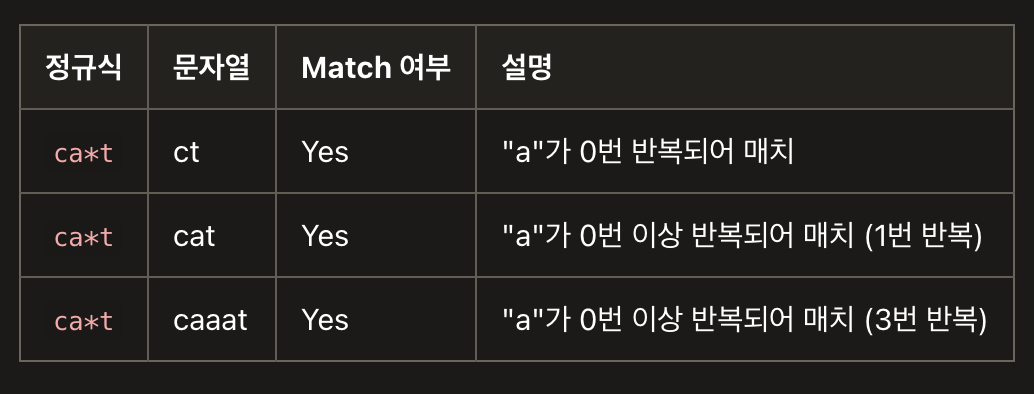


### 반복 (+)
반복을 나타내는 또 다른 메타 문자로 +가 있다. +는 최소 1번 이상 반복될 때 사용한다. 즉 *가 반복 횟수 0부터라면 +는 반복 횟수 1부터인 것이다.  

다음 정규식을 보자.

ca+t
위 정규식의 의미는 다음과 같다.

>"c + a(1번 이상 반복) + t"

위 정규식에 대한 매치여부는 다음 표와 같다.

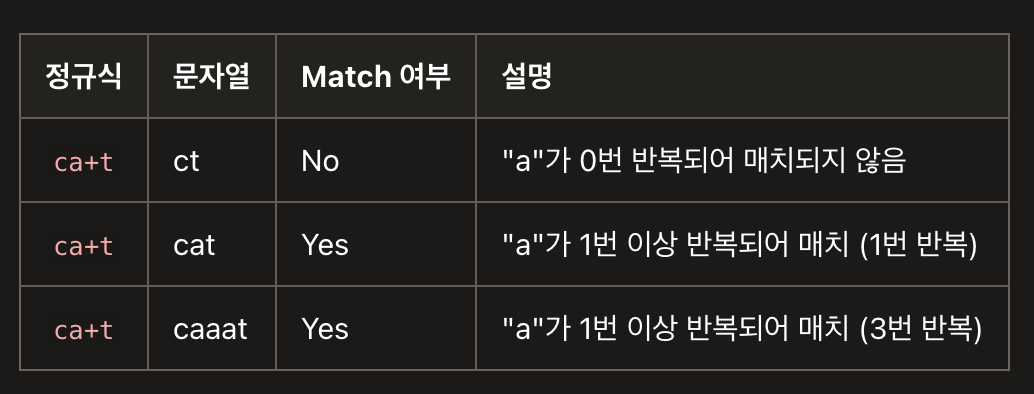

### 반복 ({m,n}, ?)

### 2. 파이썬에서 정규 표현식을 지원하는 re 모듈

여기에서 잠깐 생각해 볼 게 있다. 반복 횟수를 3회만 또는 1회부터 3회까지만으로 제한하고 싶을 수도 있지 않을까?

{ } 메타 문자를 사용하면 반복 횟수를 고정할 수 있다. {m, n} 정규식을 사용하면 반복 횟수가 m부터 n까지 매치할 수 있다. 또한 m 또는 n을 생략할 수도 있다. 만약 {3,}처럼 사용하면 반복 횟수가 3 이상인 경우이고 {,3}처럼 사용하면 반복 횟수가 3 이하를 의미한다. 생략된 m은 0과 동일하며, 생략된 n은 무한대(2억 개 미만)의 의미를 갖는다.

{1,}은 +와 동일하고, {0,}은 *와 동일하다.

{ }을 사용한 몇 가지 정규식을 살펴보자.

1. {m}

ca{2}t
위 정규식의 의미는 다음과 같다.

"c + a(반드시 2번 반복) + t"

위 정규식에 대한 매치여부는 다음 표와 같다.

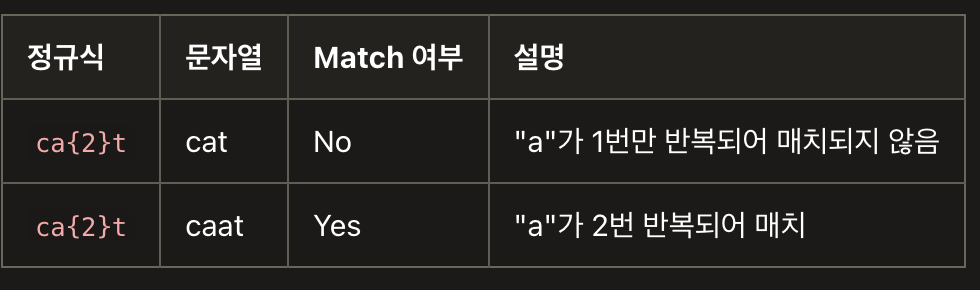

2. {m, n}

ca{2,5}t
위 정규식의 의미는 다음과 같다:

"c + a(2~5회 반복) + t"

위 정규식에 대한 매치여부는 다음 표와 같다.

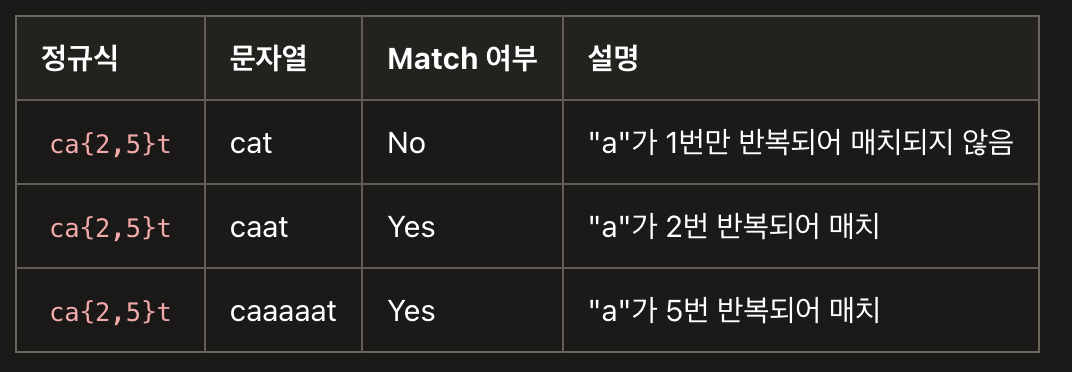

3. ?

반복은 아니지만 이와 비슷한 개념으로 ? 이 있다. ? 메타문자가 의미하는 것은 {0, 1} 이다.

다음 정규식을 보자.

ab?c
위 정규식의 의미는 다음과 같다:

>"a + b(있어도 되고 없어도 된다) + c"

위 정규식에 대한 매치여부는 다음 표와 같다.

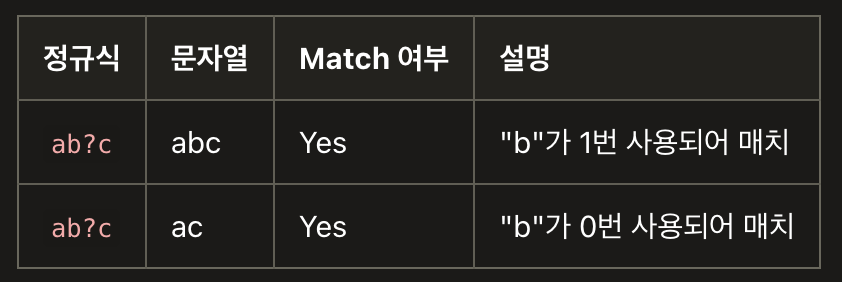

즉 b 문자가 있거나 없거나 둘 다 매치되는 경우이다.

*, +, ? 메타 문자는 모두 {m, n} 형태로 고쳐 쓰는 것이 가능하지만 가급적 이해하기 쉽고 표현도 간결한 *, +, ? 메타 문자를 사용하는 것이 좋다.

지금까지 아주 기초적인 정규 표현식에 대해서 알아보았다. 알아야 할 것들이 아직 많이 남아 있지만 그에 앞에서 파이썬으로 이러한 정규 표현식을 어떻게 사용할 수 있는지 먼저 알아보기로 하자.

### 파이썬에서 정규 표현식을 지원하는 re 모듈
파이썬은 정규 표현식을 지원하기 위해 re(regular expression의 약어) 모듈을 제공한다. re 모듈은 파이썬을 설치할 때 자동으로 설치되는 표준 라이브러리로 사용 방법은 다음과 같다.
```python
>>> import re
>>> p = re.compile('ab*')
re.compile을 사용하여 정규 표현식(위 예에서는 ab*)을 컴파일한다. re.compile의 결과로 돌려주는 객체 p(컴파일된 패턴 객체)를 사용하여 그 이후의 작업을 수행할 것이다.
```
- 정규식을 컴파일할 때 특정 옵션을 주는 것도 가능한데, 이에 대해서는 뒤에서 자세히 살펴본다.
- 패턴이란 정규식을 컴파일한 결과이다.


### 정규식을 이용한 문자열 검색
이제 컴파일된 패턴 객체를 사용하여 문자열 검색을 수행해 보자. 컴파일된 패턴 객체는 다음과 같은 4가지 메서드를 제공한다.

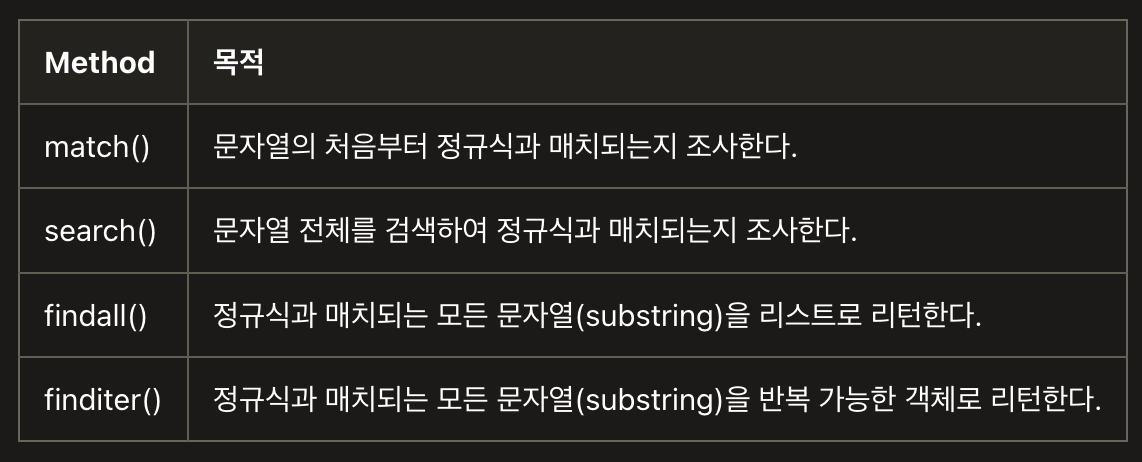

match, search는 정규식과 매치될 때는 match 객체를 리턴하고, 매치되지 않을 때는 None을 리턴한다. 이들 메서드에 대한 간단한 예를 살펴보자.

>match 객체란 정규식의 검색 결과로 리턴된 객체를 말한다.

우선 다음과 같은 패턴을 만들어 보자.

In [2]:
import re
p = re.compile('[a-z]+')

#### match
match 메서드는 문자열의 처음부터 정규식과 매치되는지 조사한다. 위 패턴에 match 메서드를 수행해 보자.



In [3]:
m = p.match("python")
print(m)

<re.Match object; span=(0, 6), match='python'>


"python" 문자열은 [a-z]+ 정규식에 부합되므로 match 객체를 돌려준다.

In [4]:
m = p.match("3 python")
print(m)

None


"3 python" 문자열은 처음에 나오는 문자 3이 정규식 [a-z]+에 부합되지 않으므로 None을 돌려준다.

match의 결과로 match 객체 또는 None을 리턴하기 때문에 파이썬 정규식 프로그램은 보통 다음과 같은 흐름으로 작성한다.

```python
p = re.compile(정규표현식)
m = p.match('string goes here')
if m:
    print('Match found: ', m.group())
else:
    print('No match')

즉 match의 결괏값이 있을 때만 그다음 작업을 수행하겠다는 것이다.

#### search
컴파일된 패턴 객체 p를 가지고 이번에는 search 메서드를 수행해 보자.

In [5]:
m = p.search("python")
print(m)

<re.Match object; span=(0, 6), match='python'>


"python" 문자열에 search 메서드를 수행하면 match 메서드를 수행했을 때와 동일하게 매치된다.

In [6]:
m = p.search("3, python")
print(m)

<re.Match object; span=(3, 9), match='python'>


"3 python" 문자열의 첫 번째 문자는 "3"이지만 search는 문자열의 처음부터 검색하는 것이 아니라 문자열 전체를 검색하기 때문에 "3 " 이후의 "python" 문자열과 매치된다.

이렇듯 match 메서드와 search 메서드는 문자열의 처음부터 검색할지의 여부에 따라 다르게 사용해야 한다.

#### findall
이번에는 findall 메서드를 수행해 보자.

In [7]:
result = p.findall("life is too short")
print(result)

['life', 'is', 'too', 'short']


findall은 패턴([a-z]+)과 매치되는 모든 값을 찾아 리스트로 리턴한다.

#### finditer
이번에는 finditer 메서드를 수행해 보자.

In [8]:
result = p.finditer("life is too short")
print(result)

In [9]:
for r in result: print(r)

<re.Match object; span=(0, 4), match='life'>
<re.Match object; span=(5, 7), match='is'>
<re.Match object; span=(8, 11), match='too'>
<re.Match object; span=(12, 17), match='short'>


finditer는 findall과 동일하지만 그 결과로 반복 가능한 객체(iterator object)를 리턴한다. 그리고 반복 가능한 객체가 포함하는 각각의 요소는 match 객체이다.

### match 객체의 메서드

자, 이제 match 메서드와 search 메서드를 수행한 결과로 리턴된 match 객체에 대해 알아보자. 앞에서 정규식을 사용한 문자열 검색을 수행하면서 아마도 다음과 같은 궁금증이 생겼을 것이다.

- 어떤 문자열이 매치되었는가?
- 매치된 문자열의 인덱스는 어디서부터 어디까지인가?  
match 객체의 메서드를 사용하면 이 같은 궁금증을 해결할 수 있다. 다음 표를 보자.

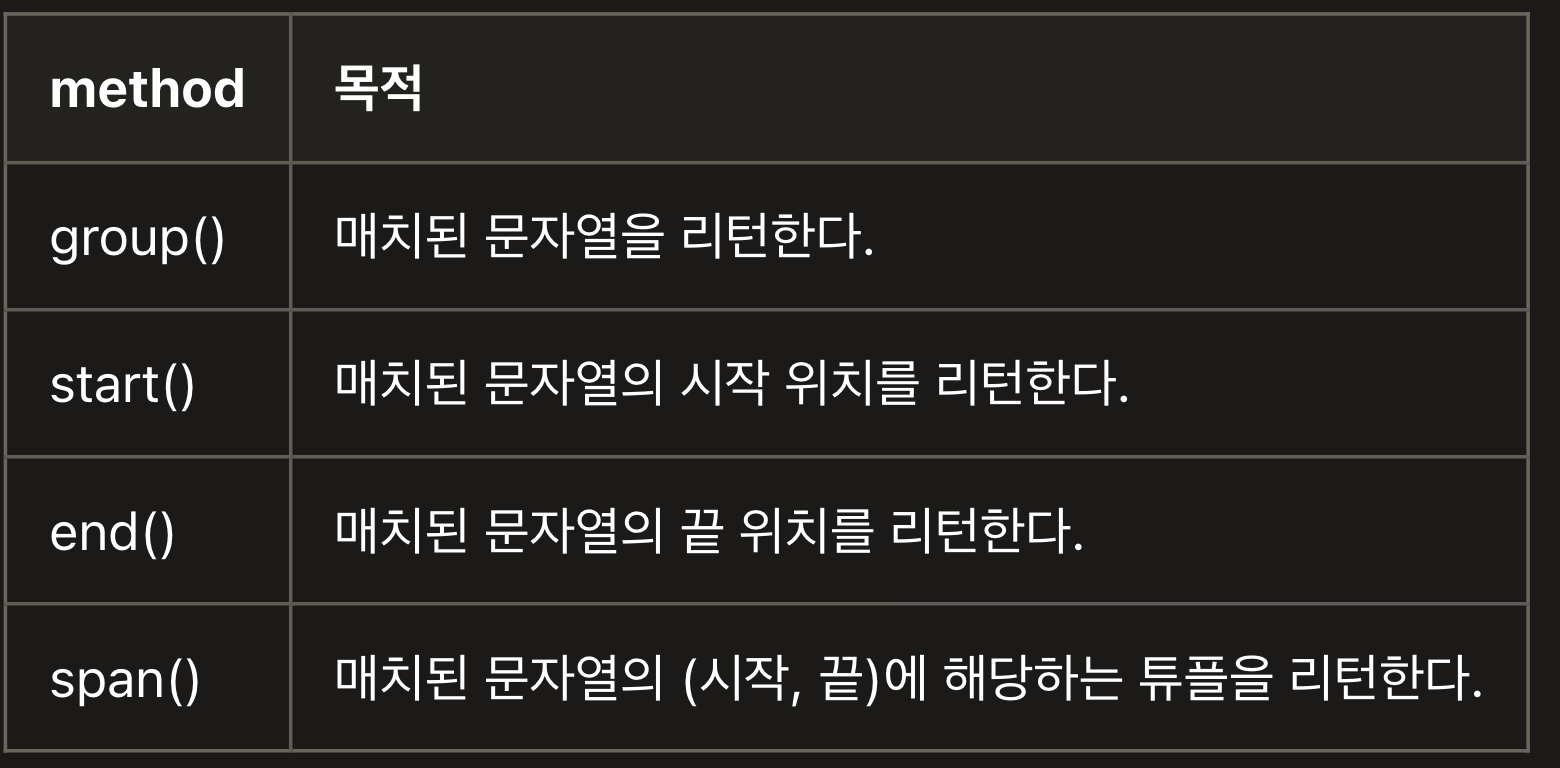

다음 예로 확인해 보자.

In [10]:
m = p.match("python")
m.group()

'python'

In [11]:
m.start()

0

In [12]:
m.end()

6

In [13]:
m.span()

(0, 6)

예상한 대로 결괏값이 출력되는 것을 확인할 수 있다. match 메서드를 수행한 결과로 돌려준 match 객체의 start()의 결괏값은 항상 0일 수밖에 없다. 왜냐하면 match 메서드는 항상 문자열의 시작부터 조사하기 때문이다.

만약 search 메서드를 사용했다면 start() 값은 다음과 같이 다르게 나올 것이다.

In [14]:
m = p.search("3 python")
m.group()

'python'

In [15]:
m.start()

2

In [16]:
m.end()

8

In [17]:
m.span()

(2, 8)

---------------
Jump to python

#### 모듈 단위로 수행하기
지금까지 우리는 re.compile을 사용하여 컴파일된 패턴 객체로 그 이후의 작업을 수행했다. re 모듈은 이것을 보다 축약한 형태로 사용할 수 있는 방법을 제공한다. 다음 예를 보자.



In [18]:
p = re.compile('[a-z]+')
m = p.match("python")

위 코드가 축약된 형태는 다음과 같다.

In [19]:
m = re.match('[a-z]+', 'python')

위 예처럼 사용하면 컴파일과 match 메서드를 한 번에 수행할 수 있다. 보통 한 번 만든 패턴 객체를 여러번 사용해야 할 때는 이 방법보다 re.compile을 사용하는 것이 편하다.

### 컴파일 옵션
정규식을 컴파일할 때 다음 옵션을 사용할 수 있다.

- DOTALL(S) - . 이 줄바꿈 문자를 포함하여 모든 문자와 매치할 수 있도록 한다.
- IGNORECASE(I) - 대소문자에 관계없이 매치할 수 있도록 한다.
- MULTILINE(M) - 여러줄과 매치할 수 있도록 한다. (^, $ 메타문자의 사용과 관계가 있는 옵션이다)
- VERBOSE(X) - verbose 모드를 사용할 수 있도록 한다. (정규식을 보기 편하게 만들수 있고 주석등을 사용할 수 있게된다.)  

옵션을 사용할 때는 re.DOTALL처럼 전체 옵션 이름을 써도 되고 re.S처럼 약어를 써도 된다.

#### DOTALL, S
. 메타 문자는 줄바꿈 문자(\n)를 제외한 모든 문자와 매치되는 규칙이 있다. 만약 \n 문자도 포함하여 매치하고 싶다면 re.DOTALL 또는 re.S 옵션을 사용해 정규식을 컴파일하면 된다.

다음 예를 보자.


In [20]:
import re
p = re.compile('a.b')
m = p.match('a\nb')
print(m)

None


정규식이 a.b인 경우 문자열 a\nb는 매치되지 않음을 알 수 있다. 왜냐하면 \n은 . 메타 문자와 매치되지 않기 때문이다. \n 문자와도 매치되게 하려면 다음과 같이 re.DOTALL 옵션을 사용해야 한다.

In [21]:
p = re.compile('a.b', re.DOTALL)
m = p.match('a\nb')
print(m)

<re.Match object; span=(0, 3), match='a\nb'>


보통 re.DOTALL 옵션은 여러 줄로 이루어진 문자열에서 줄바꿈 문자에 상관없이 검색할 때 많이 사용한다.



#### IGNORECASE, I
re.IGNORECASE 또는 re.I 옵션은 대소문자 구별 없이 매치를 수행할 때 사용하는 옵션이다. 다음 예제를 보자.

In [22]:
import re
p = re.compile('[a-z]+', re.I)
p.match('python')

<re.Match object; span=(0, 6), match='python'>

In [23]:
p = re.compile('[a-z]+', re.I)
p.match('Python')



<re.Match object; span=(0, 6), match='Python'>

In [24]:
p.match('PYTHON')

<re.Match object; span=(0, 6), match='PYTHON'>

#### MULTILINE, M  

re.MULTILINE 또는 re.M 옵션은 조금 후에 설명할 메타 문자인 ^, $와 연관된 옵션이다. 이 메타 문자에 대해 간단히 설명하자면 ^는 문자열의 처음을 의미하고, $는 문자열의 마지막을 의미한다. 예를 들어 정규식이 ^python인 경우 문자열의 처음은 항상 python으로 시작해야 매치되고, 만약 정규식이 python$이라면 문자열의 마지막은 항상 python으로 끝나야 매치된다는 의미이다.

다음 예를 보자.

In [25]:
import re
p = re.compile("^python\s\w+")

data = """python one
life is too short
python two
you need python
python three"""

print(p.findall(data))


['python one']


정규식 ^python\s\w+은 python이라는 문자열로 시작하고 그 뒤에 whitespace, 그 뒤에 단어가 와야 한다는 의미이다. 검색할 문자열 data는 여러 줄로 이루어져 있다.

이 스크립트를 실행하면 다음과 같은 결과를 돌려준다.

['python one']

^ 메타 문자에 의해 python이라는 문자열을 사용한 첫 번째 줄만 매치된 것이다.

하지만 ^ 메타 문자를 문자열 전체의 처음이 아니라 각 라인의 처음으로 인식시키고 싶은 경우도 있을 것이다. 이럴 때 사용할 수 있는 옵션이 바로 re.MULTILINE 또는 re.M이다. 위 코드를 다음과 같이 수정해 보자.

In [26]:
import re
p = re.compile("^python\s\w+", re.MULTILINE)

data = """python one
life is too short
python two
you need python
python three"""

print(p.findall(data))

['python one', 'python two', 'python three']


re.MULTILINE 옵션으로 인해 ^ 메타 문자가 문자열 전체가 아닌 각 줄의 처음이라는 의미를 갖게 되었다. 이 스크립트를 실행하면 다음과 같은 결과가 출력된다.

['python one', 'python two', 'python three']  

즉 re.MULTILINE 옵션은 ^, $ 메타 문자를 문자열의 각 줄마다 적용해 주는 것이다.

#### VERBOSE, X
지금껏 알아본 정규식은 매우 간단하지만 정규식 전문가들이 만든 정규식을 보면 거의 암호수준이다. 정규식을 이해하려면 하나하나 조심스럽게 뜯어보아야만 한다. 이렇게 이해하기 어려운 정규식을 주석 또는 줄 단위로 구분할 수 있다면 얼마나 보기 좋고 이해하기 쉬울까? 방법이 있다. 바로 re.VERBOSE 또는 re.X 옵션을 사용하면 된다.

다음 예를 보자.

In [27]:
charref = re.compile(r'&[#](0[0-7]+|[0-9]+|x[0-9a-fA-F]+);')

위 정규식이 쉽게 이해되는가? 이제 다음 예를 보자.

In [28]:
charref = re.compile(r"""
 &[#]                # Start of a numeric entity reference
 (
     0[0-7]+         # Octal form
   | [0-9]+          # Decimal form
   | x[0-9a-fA-F]+   # Hexadecimal form
 )
 ;                   # Trailing semicolon
""", re.VERBOSE)

첫 번째와 두 번째 예를 비교해 보면 컴파일된 패턴 객체인 charref는 모두 동일한 역할을 한다. 하지만 정규식이 복잡할 경우 두 번째처럼 주석을 적고 여러 줄로 표현하는 것이 훨씬 가독성이 좋다는 것을 알 수 있다.

re.VERBOSE 옵션을 사용하면 문자열에 사용된 whitespace는 컴파일할 때 제거된다(단 [ ] 안에 사용한 whitespace는 제외). 그리고 줄 단위로 #기호를 사용하여 주석문을 작성할 수 있다.

### 백슬래시 문제
정규 표현식을 파이썬에서 사용할 때 혼란을 주는 요소가 한 가지 있는데, 바로 백슬래시(\)이다.

예를 들어 어떤 파일 안에 있는 "\section" 문자열을 찾기 위한 정규식을 만든다고 가정해 보자.

\section
이 정규식은 \s 문자가 whitespace로 해석되어 의도한 대로 매치가 이루어지지 않는다.

위 표현은 다음과 동일한 의미이다.

[ \t\n\r\f\v]ection
의도한 대로 매치하고 싶다면 다음과 같이 변경해야 한다.

\\section
즉 위 정규식에서 사용한 \ 문자가 문자열 자체임을 알려 주기 위해 백슬래시 2개를 사용하여 이스케이프 처리를 해야 한다.

따라서 위 정규식을 컴파일하려면 다음과 같이 작성해야 한다.

In [29]:
p = re.compile('\\section')

그런데 여기에서 또 하나의 문제가 발견된다. 위처럼 정규식을 만들어서 컴파일하면 실제 파이썬 정규식 엔진에는 파이썬 문자열 리터럴 규칙에 따라 \\이 \로 변경되어 \section이 전달된다.

>이 문제는 위와 같은 정규식을 파이썬에서 사용할 때만 발생한다(파이썬의 리터럴 규칙). 유닉스의 grep, vi 등에서는 이러한 문제가 없다.

결국 정규식 엔진에 \\ 문자를 전달하려면 파이썬은 \\\\처럼 백슬래시를 4개나 사용해야 한다.

>정규식 엔진은 정규식을 해석하고 수행하는 모듈이다.

In [30]:
p = re.compile('\\\\section')

이렇게 해야만 원하는 결과를 얻을 수 있다. 하지만 너무 복잡하지 않은가?

만약 위와 같이 \를 사용한 표현이 계속 반복되는 정규식이라면 너무 복잡해서 이해하기 쉽지않을 것이다. 이러한 문제를 해결하려면 Raw String을 사용해야 한다. 그 방법은 다음과 같다.

In [31]:
p = re.compile(r'\\section')

위와 같이 정규식 문자열 앞에 r 문자를 삽입하면 이 정규식은 Raw String 규칙에 의하여 백슬래시 2개 대신 1개만 써도 2개를 쓴 것과 동일한 의미를 갖게 된다.

>만약 백슬래시를 사용하지 않는 정규식이라면 r의 유무에 상관없이 동일한 정규식이 될 것이다.

